Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.



In [ ]:
import pandas as pd
import numpy as np

data = {"x":np.array([0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3]),
        "y":np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])}

df = pd.DataFrame(data)


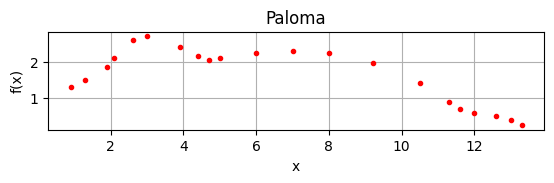

In [ ]:
import matplotlib.pyplot as plt
import scipy.interpolate as inter

def dibujarDatos():
  plt.plot(df.x,df.y,"r.")
  plt.title("Paloma")
  plt.xlabel("x")
  plt.ylabel("f(x)")
  plt.gca().set_aspect('equal')
  plt.grid()

dibujarDatos()

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

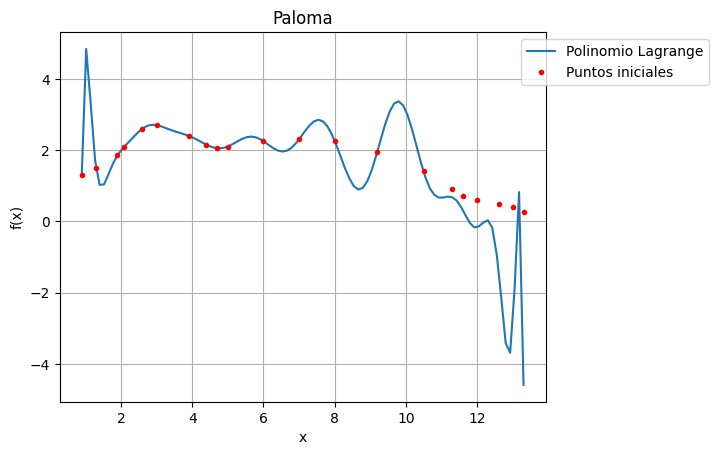

In [ ]:
def interpolacionPolinomioLagrange(df_x, df_y):
  polinomio = inter.lagrange(df_x,df_y)
  #print("Tipo = ", type(polinomio))
  x = np.linspace(0.9,13.3,100)
  y = np.zeros(len(x))
  i=0
  for xi in x:
    y[i] = polinomio(xi)
    i += 1
  return x, y

xi, yi = interpolacionPolinomioLagrange(df.x,df.y)

def dibujarInterpolacion(x,y,xi,yi,titulo,labelgrafica):
  plt.plot(xi,yi, label= labelgrafica)
  plt.gca().set_aspect('equal')
  plt.title(titulo)
  plt.xlabel("x")
  plt.ylabel("f(x)")
  plt.plot(x,y, "r.", label="Puntos iniciales")
  plt.grid()
  plt.legend(bbox_to_anchor=(1.35, 1))

dibujarInterpolacion(df.x,df.y,xi,yi, "Paloma", "Polinomio Lagrange")

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),



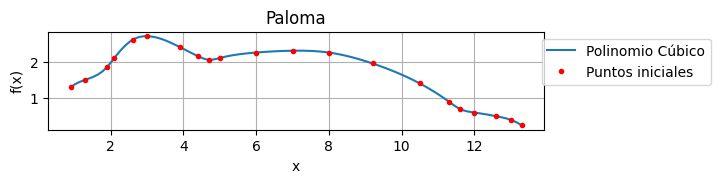

In [ ]:
def interpolacionSplinesCubica(df_x, df_y):
  polinomio = inter.CubicSpline(df_x,df_y)
  #print("Tipo = ", type(polinomio))
  x = np.linspace(0.9,13.3,100)
  y = np.zeros(len(x))
  i=0
  for xi in x:
    y[i] = polinomio(xi)
    i += 1
  return x, y

xi, yi = interpolacionSplinesCubica(df.x,df.y)
dibujarInterpolacion(df.x,df.y,xi,yi, "Paloma", "Polinomio Cúbico")


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

<ipython-input-13-3c0a01469af7>:8: RuntimeWarning: invalid value encountered in divide
  derivada = dery/derx


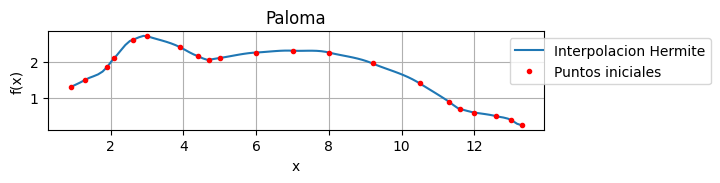

In [ ]:
def interpolacionHermite(df_x, df_y):
  xh = np.array(df_x)
  xh = np.insert(xh,len(xh),xh[len(xh)-1])
  yh = np.array(df_y)
  yh = np.insert(yh,len(yh),yh[len(yh)-1])
  derx = np.diff(xh)
  dery = np.diff(yh)
  derivada = dery/derx
  derivada[len(derivada)-1] = 0
  polinomio = inter.CubicHermiteSpline(df_x,df_y,derivada)
  #print("Tipo = ", type(polinomio))
  x = np.linspace(0.9,13.3,100)
  y = np.zeros(len(x))
  i=0
  for xi in x:
    y[i] = polinomio(xi)
    i += 1
  return x, y


xi, yi = interpolacionHermite(df.x,df.y)
dibujarInterpolacion(df.x,df.y,xi,yi, "Paloma", "Interpolacion Hermite")

In [ ]:
xl, yl = interpolacionPolinomioLagrange(df.x,df.y)
xc, yc = interpolacionSplinesCubica(df.x,df.y)
xh, yh = interpolacionHermite(df.x,df.y)



<ipython-input-13-3c0a01469af7>:8: RuntimeWarning: invalid value encountered in divide
  derivada = dery/derx


**En la siguiente imagen se puede observar que los métodos de interpolación que más se aproximan a la figura de paloma que se desea son el Polinomio Cúbico y la interpolación Hermite.**

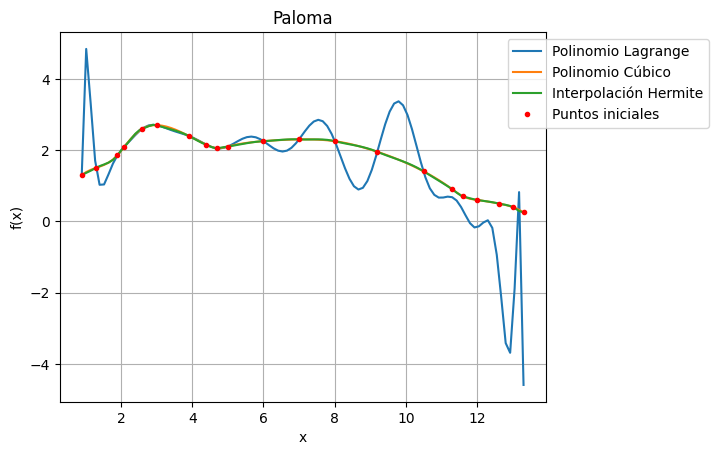

In [ ]:
plt.plot(xl,yl, label= r"Polinomio Lagrange")
plt.plot(xc,yc, label= r"Polinomio Cúbico")
plt.plot(xh,yh, label= r"Interpolación Hermite")
plt.gca().set_aspect('equal')
plt.title("Paloma")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(df.x,df.y, "r.", label="Puntos iniciales")
plt.grid()
plt.legend(bbox_to_anchor=(1.35, 1))